In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score




In [77]:
# Loading the dataset 
url = "https://raw.githubusercontent.com/ronyhait14/churn/main/Churn_Modelling.csv"
df = pd.read_csv(url)
df.head(10)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [78]:

features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
target_variable = 'Exited'

X = df[features]
y = df[target_variable]


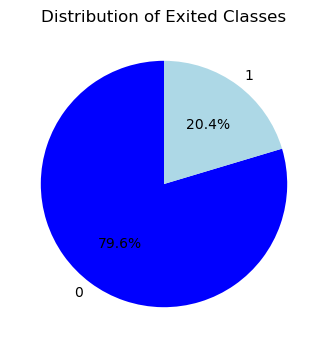

In [98]:
exited_counts = df['Exited'].value_counts()

#  pie chart
plt.figure(figsize=(4, 4))
plt.pie(exited_counts, labels=exited_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'lightblue'])
plt.title('Distribution of Exited Classes')
plt.show()

In [99]:

subset_df = df[features]
# Printing correlation matrix
correlation_matrix = subset_df.corr()
correlation_matrix

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000


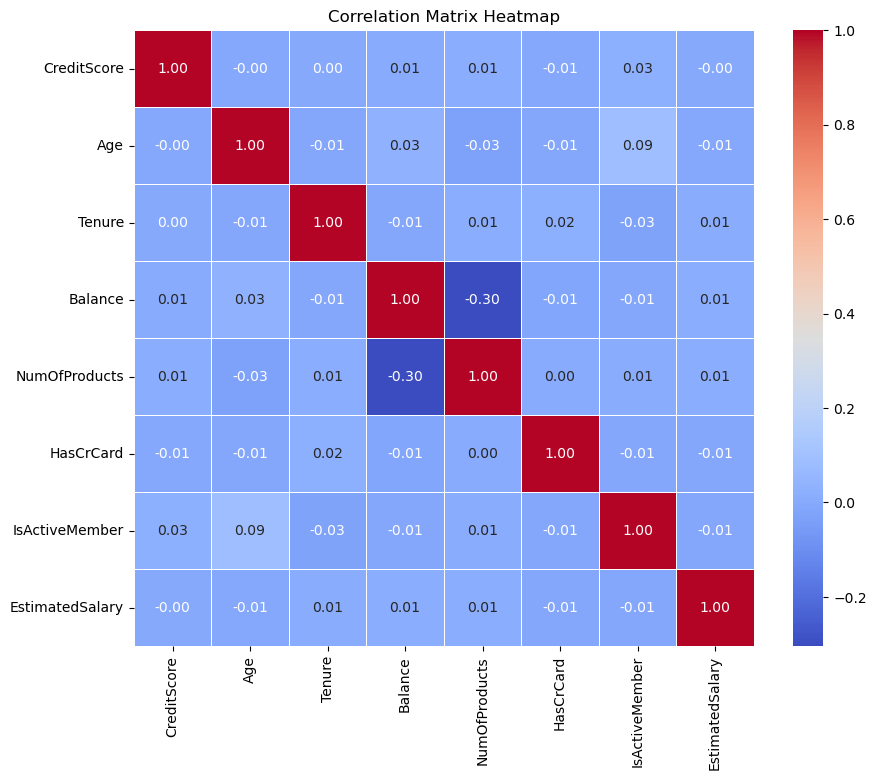

In [81]:
#  heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [100]:

# Using Random Forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)


# Get feature importances as a percentage of the total importance
total_importance = rf_model.feature_importances_.sum()
feature_importances = pd.DataFrame({'Feature': features, 'Importance': (rf_model.feature_importances_ / total_importance) * 100})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances (in Percentage ):")
feature_importances


Feature Importances (in Percentage ):


,Feature,Importance
1,Age,24.740747
7,EstimatedSalary,16.645760
0,CreditScore,16.264773
3,Balance,14.832073
4,NumOfProducts,13.450297
2,Tenure,8.414064
6,IsActiveMember,3.968276
5,HasCrCard,1.684010


In [101]:
# Calculate accuracy as a percentage
accuracy_percentage = accuracy_score(y_test, y_pred) * 100
print("Accuracy:", f"{accuracy_percentage:.2f}%")

Accuracy: 85.95%


In [105]:
print("COMPAIRING WITH OTHER ALGORITHMS")

# Standardize numerical features (for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    if name == 'Support Vector Machine':
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
    else:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

COMPAIRING WITH OTHER ALGORITHMS
Logistic Regression Accuracy: 0.8005
Random Forest Accuracy: 0.8590
Gradient Boosting Accuracy: 0.8625
Support Vector Machine Accuracy: 0.8520
